# Importing the MNIST dataset

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist= fetch_openml('mnist_784', as_frame=False)

In [4]:
X,y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

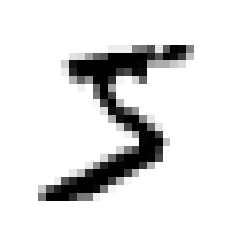

In [6]:
# There are 70,000 images and each image has 784 features. This is because each image is
# 28*28 pixels and each feature represents one pixel's intensity 0(white) and 255 (black)

import matplotlib.pyplot as plt

def plot_digit(image_data):
    image= image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit= X[0]
plot_digit(some_digit)
plt.show()

In [7]:
y[0]

'5'

In [8]:
#splitting the dataset in to train and test
X_train, X_test, y_train, y_test= X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:

y_train_5= (y_train=='5')
y_test_5= (y_test=='5')

In [10]:
#The class SGDClassifier implements a plain stochastic gradient descent learning routine which supports different loss functions
#and penalties for classification.

from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [13]:
#a confusion matrix is such that C i , j is equal to the number of observations known to be in group and predicted to be in group

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train_5, y_train_pred)

cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [14]:
# 53892 of the total images are correctly classified as non-5s
# 687 are wrongly classified as 5s (false positive, also called as Type I error)
# 1891 were wrongly classified as non-5s (false negatives, also called as type II errors)
# 3530 were correctly classified as 5s (true positive)

In [15]:
# Precision formula= TP/(TP+FP)

# Recall or Sensitivity or TPR (True Positive Rate)= TP/(TP+FN)

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [16]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [17]:
# When a prediction claims an image represents a 5, it is correct 83.7% of the time.
# Moreover, it only detects 65.1% of the 5s

In [18]:
# F1 score- is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the
# harmonic mean gives much more weight to low values. The classifier will only get a high F1 score
# if both recall and precision are high

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [19]:
# ROC Curve (Receiver Operating Characteristic)- The curve plots the TPR or recall against the FPR
# FPR(fall-out) is the ratio of negative instances that are incorrectly classified as Positive

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_train_pred)


0.8192920558800075

In [20]:
#A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and 
#uses averaging to improve the predictive accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier

forest_clf= RandomForestClassifier(random_state=42)

y_probas_forest= cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

# Multiclass Classification

In [21]:
# One-versus-the-rest- we will be training 10 binary classifier (0 to 9)
# Then when you want to classify an image, you get the decision score from each classifier
# for that image and you select the class whose classifier outputs the highest score (one versus all)

# One-vs-One (1-2,1-3) If there are N classes, you need to train N*(N-1)/2 classifiers
# 45 binary classifiers

from sklearn.svm import SVC

svm_clf= SVC(random_state=42)

svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [22]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

# ONE VS REST classifier

In [23]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf= OneVsRestClassifier(SVC(random_state=42))

ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [24]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [25]:
len(ovr_clf.estimators_)

10

In [26]:
sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [27]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [28]:
#StandardScaler removes the mean and scales each feature/variable to unit variance.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled= scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred= cross_val_predict(ovr_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()